# Projeto 1
MS211


## Leitura dos Dados

In [95]:
%matplotlib inline
##Bibliotecas importadas
# Biblioteca usada para abrir arquivos CSV
import csv
# Bibilioteca para fazer leitura de datas
from datetime import datetime, timedelta
# Fazer o ajuste de datas no gráfico
import matplotlib.dates as mdate
# Biblioteca mateḿática
import numpy as np
# Bibloteca para traçar gráficos
import matplotlib.pyplot as plt

# Faz a abertura do arquiv
dados = list( csv.reader( open('DadosCantareira22082015.csv','r') ) )

# Cria vetores que armazenarão o conteudo do arquivo
datas = list()
dias = list()
n = 0
niveis = list()

# Faz a passagem dos dados do arquivo para os vetores
for dado in dados:
    dias.append(n)
    n = n + 1
    data = dado[0]
    data_aux = datetime(year=int(data[0:4]), month=int(data[4:6]), day=int(data[6:8]))
    datas.append(data_aux)
    niveis.append(float(dado[1]))

### Traçando o Gráfico

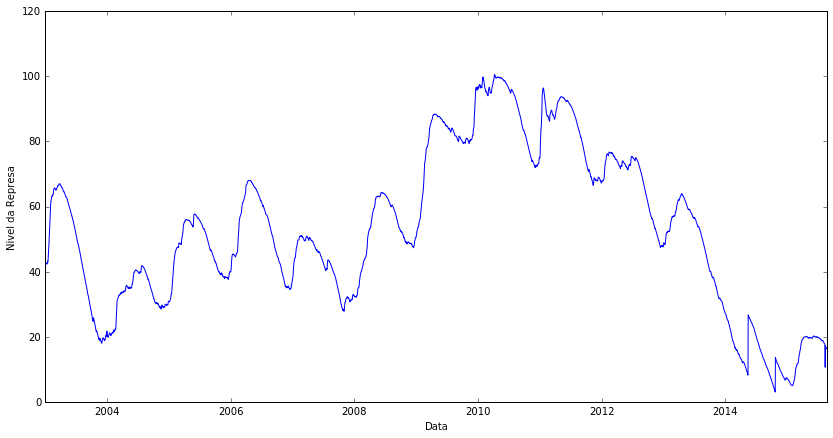

In [96]:
plt.plot(datas ,niveis)
plt.gcf().set_size_inches(14,7)
plt.ylabel('Nivel da Represa')
plt.xlabel('Data')
plt.show()

## Ajuste das Curvas

### Primeiro Grau

#### Implementação do Método

In [97]:
# Implementação do método dos minimos quadrados para grau 1
def met_min_qua_1():
    tab_aux = np.zeros((n,2))
    m = 0
    for i in tab_aux:
        i[0] = dias[m]
        i[1] = 1
        m = m + 1
    
    A = np.zeros((2,2))
    A.itemset()
            
    print(tab_aux)


#### Traçando o Gráfico

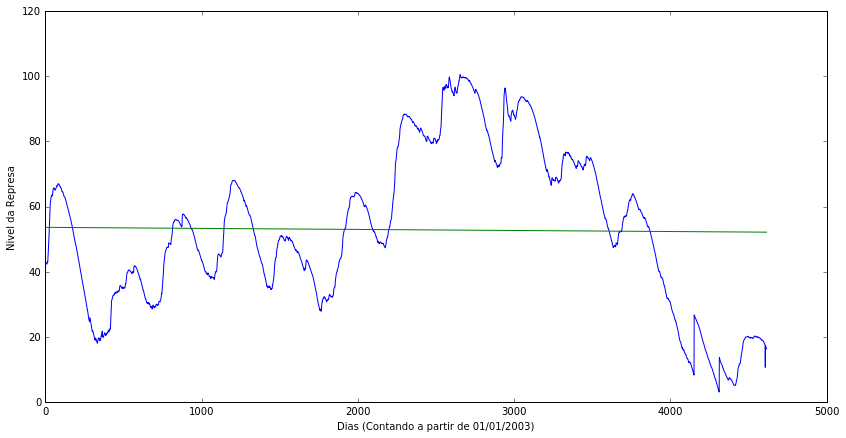

In [98]:
coeficientes = np.polyfit(dias,niveis,1)

polinomio = np.poly1d(coeficientes)

plt.plot(dias, niveis, dias, polinomio(dias))
plt.ylabel('Nivel da Represa')
plt.xlabel('Dias (Contando a partir de 01/01/2003)')
plt.gcf().set_size_inches(14,7)
plt.show()

#### Calculando o Residuo

In [99]:
residual = 0
for i in dias:
    residual = residual + ( polinomio(i) - niveis[i] )**2

print("O residuo é " + str(residual))

O residuo é 2736075.73591


A curva de grau 1 não representa bem o comportamento da represa. (COLOCAR O POR QUE)

### Ajuste de grau 4

#### Implementação do Método

Para obter um polinomio de grau 4 e maiores optamos por usar a biblioteca de python que implementa o método dos minimos quadrados de forma genérica, gerando o polinomio resultante.
Esta função encontra-se na biblioteca numpy.
A implementação dela ficaria muito próxima da implementação da de grau 1, sendo que a matriz para resolver seria de 4x4 e não 2x2.

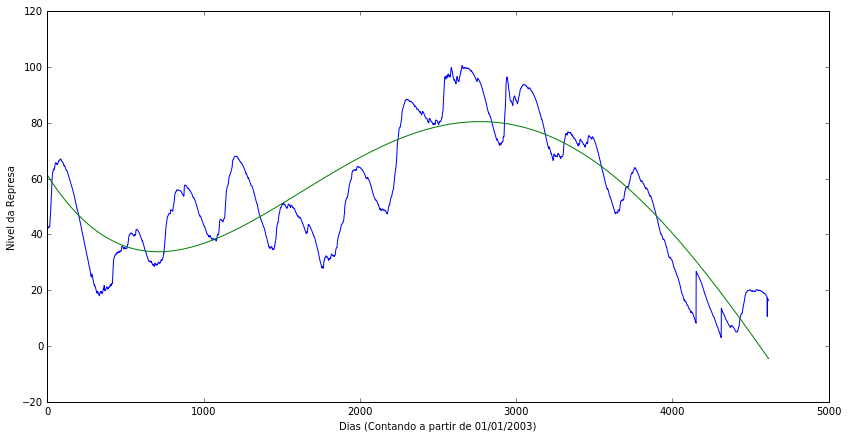

In [100]:
coeficientes = np.polyfit(dias,niveis,4)

polinomio = np.poly1d(coeficientes)

plt.plot(dias, niveis, dias, polinomio(dias))
plt.ylabel('Nivel da Represa')
plt.xlabel('Dias (Contando a partir de 01/01/2003)')
plt.gcf().set_size_inches(14,7)
plt.show()


#### Calculando o Residuo

O residuo é a soma dos quadrados da diferença do ponto no polinomio encontrado com o valor real do ponto.

In [101]:
residual = 0
for i in dias:
    residual = residual + ( polinomio(i) - niveis[i] )**2

print("O residuo é " + str(residual))

O residuo é 765031.452239


### Definindo um grau de polinomio

Testando polinomios do grau 1 até o grau 18 e avaliamos visualmente que o polinomio de grau 16 foi o que obteve a melhor aproximação do gráfico com um tempo de computação razoável

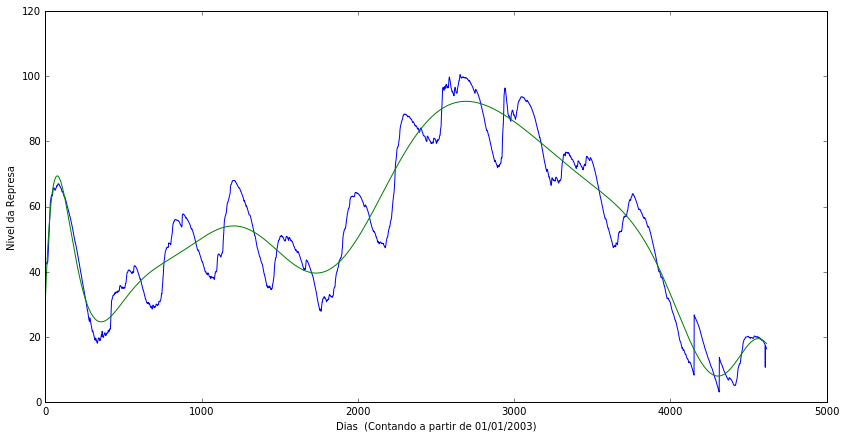

In [102]:
coeficientes = np.polyfit(dias,niveis,16)

polinomio = np.poly1d(coeficientes)

plt.plot(dias, niveis, dias, polinomio(dias))
plt.ylabel('Nivel da Represa')
plt.xlabel('Dias  (Contando a partir de 01/01/2003)')
plt.gcf().set_size_inches(14,7)
plt.show()

## Primeiro Volume Morto

### Definindo a intersecção do eixo x

#### Implementação do Método da Secante

In [103]:
def find_roots(polinomio, x0, x1):
    kMax = 50
    erro_t = 0.0001
    erro_e = 0.0001
    k = 0
    Er = 1 + erro_t
    f0 = polinomio(x0)
    f1 = polinomio(x1)
    while k < kMax and Er > erro_t:
        k = k+1
        x = (x0*f1 - x1*f0)/f1-f0
        Er = abs(x - x1)
        x0 = x1
        f0 = polinomio(x0)
        x1 = x
        f1 = polinomio(x1)
        print(k)
        
    return x1
    

In [104]:
coeficientes = np.polyfit(dias[3652:4153],niveis[3652:4153],4)
polinomio = np.poly1d(coeficientes)

raiz = np.roots(polinomio)
print('A raiz do polinomio entre os pontos 4000 e 4500 é\n raiz = ' + str(raiz[0])[0:9] + ')')

print("\n\nNo dia " + str(raiz[0]+1)[1:5] + " obeteriamos o nível 0 para a função da regressão enquanto que  o volume real era de: " + str(niveis[4264]) )

A raiz do polinomio entre os pontos 4000 e 4500 é
 raiz = (4270.497)


No dia 4271 obeteriamos o nível 0 para a função da regressão enquanto que  o volume real era de: 10.6


#### Traçando o gráfico

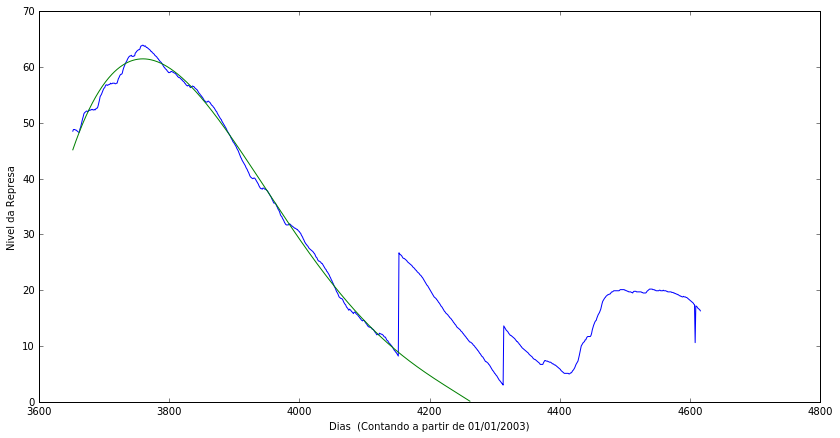

In [105]:
plt.plot(dias[3652:], niveis[3652:], dias[3652:4263], polinomio(dias[3652:4263]))
plt.ylabel('Nivel da Represa')
plt.xlabel('Dias  (Contando a partir de 01/01/2003)')
plt.gcf().set_size_inches(14,7)
plt.show()

## Segundo Volume Morto

### Raizes

Usando o método das secantes implementada no item anterior, com os pontos 4300 e 4500 obtemos:

In [106]:
coeficientes = np.polyfit(dias[4314:4415],niveis[4314:4415],3)
polinomio = np.poly1d(coeficientes)

raiz = np.roots(polinomio)
print('A raiz do polinomio entre os pontos 4000 e 4500 é\n raiz = ' + str(raiz[0])[0:9] + ')')

print("\n\nNo dia " + str(raiz[0]+1)[1:5] + " obeteriamos o nível 0 para a função da regressão enquanto que  o volume real era de: " + str(niveis[4264]) )

A raiz do polinomio entre os pontos 4000 e 4500 é
 raiz = (4452.892)


No dia 4453 obeteriamos o nível 0 para a função da regressão enquanto que  o volume real era de: 10.6


### Traçando o Gráfico

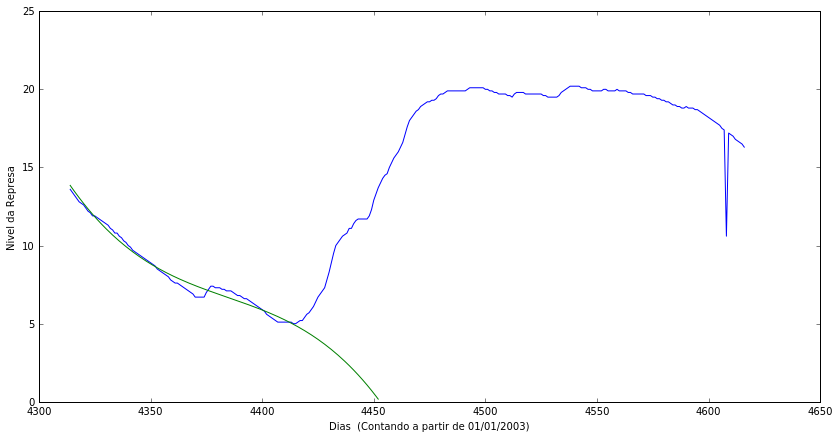

In [108]:
plt.plot(dias[4314:], niveis[4314:], dias[4314:4453], polinomio(dias[4314:4453]))
plt.ylabel('Nivel da Represa')
plt.xlabel('Dias  (Contando a partir de 01/01/2003)')
plt.gcf().set_size_inches(14,7)
plt.show()